# Imports

In [103]:
import pandas as pd
import numpy as np
import missingno as msno

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from tabulate import tabulate
from time import time

%matplotlib inline
RANDOM_SEED = 42

# Data

In [59]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=b',')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

In [60]:
null_columns = list(df.columns[df.isnull().all()])
print('Null columns:\n' + str(null_columns))

null_rows = list(df.loc[df.isnull().all(axis=1)].index)
print('\nNull rows:\n' + str(null_rows))

Null columns:
['Unnamed: 15', 'Unnamed: 16']

Null rows:
[9357, 9358, 9359, 9360, 9361, 9362, 9363, 9364, 9365, 9366, 9367, 9368, 9369, 9370, 9371, 9372, 9373, 9374, 9375, 9376, 9377, 9378, 9379, 9380, 9381, 9382, 9383, 9384, 9385, 9386, 9387, 9388, 9389, 9390, 9391, 9392, 9393, 9394, 9395, 9396, 9397, 9398, 9399, 9400, 9401, 9402, 9403, 9404, 9405, 9406, 9407, 9408, 9409, 9410, 9411, 9412, 9413, 9414, 9415, 9416, 9417, 9418, 9419, 9420, 9421, 9422, 9423, 9424, 9425, 9426, 9427, 9428, 9429, 9430, 9431, 9432, 9433, 9434, 9435, 9436, 9437, 9438, 9439, 9440, 9441, 9442, 9443, 9444, 9445, 9446, 9447, 9448, 9449, 9450, 9451, 9452, 9453, 9454, 9455, 9456, 9457, 9458, 9459, 9460, 9461, 9462, 9463, 9464, 9465, 9466, 9467, 9468, 9469, 9470]


In [61]:
df = df.replace(-200, np.nan)

# df = df.drop(df.columns[[15, 16]], axis=1)
df = df.drop(columns=null_columns)

# df = df.iloc[:9357]
df = df.drop(index=null_rows)

df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [63]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [64]:
df.shape

(9357, 15)

In [65]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

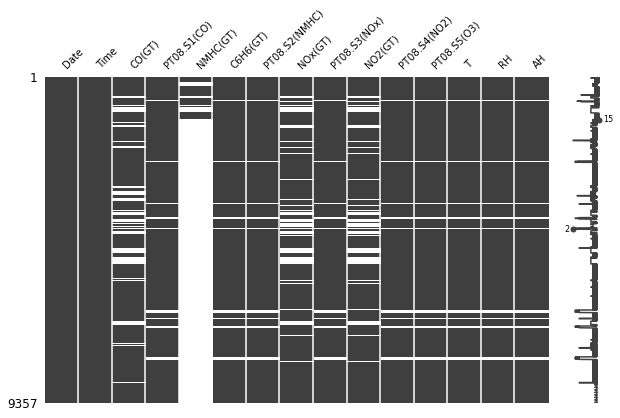

In [66]:
msno.matrix(df, figsize=(10, 6), fontsize=10);

Categorical feature

In [75]:
len(set(df['Date'].unique()))

391

## Data preparation: classical approach

In [67]:
df_1 = df.copy()

We see that 'NMHC(GT)' feature has most of data being missed. Probably, the detector was removed or broke up. We won't use this feature in our model.

In [68]:
df_1 = df.drop('NMHC(GT)', axis=1)

Remove NaN values of target feature C6H6(GT) from our dataset.

In [69]:
number_before_removing = df_1.shape[0]
print('Number of rows before removing: ' + str(number_before_removing))

df_1 = df_1[df_1['C6H6(GT)'].notnull()]

number_after_removing = df_1.shape[0]
print('Number of rows after removing: ' + str(number_after_removing))
print(str(number_before_removing - number_after_removing) + ' rows were removed as NaN values of C6H6(GT)')

Number of rows before removing: 9357
Number of rows after removing: 8991
366 rows were removed as NaN values of C6H6(GT)


To fill NaN values in non-target feature we'll use the median because it's resistant to asymmetry in data.

In [70]:
df_1 = df_1.fillna(df_1.median())

Train / test split

In [93]:
df_1 

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [95]:
x = df_1.drop('C6H6(GT)', axis=1).to_numpy()
y = df_1['C6H6(GT)'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=RANDOM_SEED)

In [96]:
# Leave only numeric features
x_train_numeric = x_train[:,2:13]
x_test_numeric = x_test[:,2:13]

In [106]:
def print_metrics(data_name, y_true, y_pred):
    """
    Print metrics for the model
  
    :param: data_name name of data
    :param: y_true set of true answers
    :param: y_pred set of predicted values
    """

    accuracy = [['MSE', 'MAE', 'R2'],
                [str(mean_squared_error(y_true, y_pred)),
                 str(mean_absolute_error(y_true, y_pred)),
                 str(r2_score(y_true, y_pred))]]
    print('\n' + data_name + ' data prediction metrics')
    print(tabulate(accuracy, tablefmt='grid'))


def print_cv_metrics(scores):
    """
    Print metrics for the model
  
    :param: scores model scores
    """

    scores = scores.copy()
    scores.pop('fit_time', None)
    scores.pop('score_time', None)
    mean_scores = dict()
    for k, v in scores.items():
        mean_scores[k] = abs(np.mean(v))

    accuracy = [['MSE', 'MAE', 'R2'],
                list(mean_scores.values())]
    print('\nAverage cross-validation metrics')
    print(tabulate(accuracy, tablefmt='grid'))


def test_model(regression, x, y, scoring, folds=5, verbose=True):
    pipeline = Pipeline(steps=[
        ('normalize', MinMaxScaler()),
        ('model', regression)
    ])
    scores = cross_validate(pipeline, x, y, scoring=scoring, cv=folds)
    if verbose:
        print_cv_metrics(scores)


## Data preparation: non-matrix approach

# Machine Learning problems

Baseline, sklearn

In [191]:
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
test_model(LinearRegression(), x_train_numeric, y_train, scoring)


Average cross-validation metrics
+-------------------+-------------------+--------------------+
| MSE               | MAE               | R2                 |
+-------------------+-------------------+--------------------+
| 1.337014375190018 | 0.821944742929879 | 0.9757277725676223 |
+-------------------+-------------------+--------------------+


In [192]:
start = time()
for i in range(100):
    test_model(LinearRegression(), x_train_numeric, y_train, scoring, verbose=False)
print(str(time() - start))

2.9256200790405273


## Gradient Desscent

### Full Gradient Desscent

In [269]:
class ManualLinearRegression:
    
    def __init__(self, alpha=0.01, threshold = 1.5, max_iterations=10000):
        self.alpha = alpha
        self.weights = np.array([])
        self.threshold = threshold
        self.max_iterations = max_iterations  # To limit number of iterations until convergence
    
    def fit(self, X, y):
        self.weights = np.random.rand(X.shape[1]+1)  # +1 because of x0
        print(f'Weights initialized: {self.weights.shape}')
        X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)  # Added x0=1
        m = X.shape[0]
        
        for i in range(self.max_iterations):  # repeat until convergence or reach max_iterations
            h = np.array([self.__hypothesis(x_, self.weights) for i, x_ in enumerate(X)])
            diff = h - y
            MSE = 1/m * sum(np.power(diff, 2))
            if i % 1000 == 0:
                print(f'Iteration {i}; MSE: {MSE}')
            if MSE < self.threshold:
                print(f'Reached limit. Iteration {i}; MSE: {MSE}')
                break
            
            derivatives = np.zeros(X.shape[1])
            for j in range(X.shape[1]):  # for each column in X
                derivatives[j] = np.dot(diff, X[:,j])
            self.weights = self.weights - self.alpha * 1/m * derivatives
    
    def predict(self, X):
        return np.array([self.__hypothesis(np.array([1]+list(x_)), self.weights) for x_ in X])
    
    def __hypothesis(self, x, w):
        return np.dot(x,w)


In [270]:
start = time()
test_model(ManualLinearRegression(alpha=0.5), x_train_numeric, y_train, scoring)
print(f'It took {round(time() - start, 2)} seconds')

Weights initialized: (12,)
Iteration 0; MSE: 107.79049589484677
Iteration 1000; MSE: 1.9841727189169787
Iteration 2000; MSE: 1.6065289767734445
Iteration 3000; MSE: 1.4600091098929966
Iteration 4000; MSE: 1.388982074419703
Iteration 5000; MSE: 1.3517262240662105
Iteration 6000; MSE: 1.3316409824390285
Iteration 7000; MSE: 1.3206994480027896
Iteration 8000; MSE: 1.3147129429962232
Iteration 9000; MSE: 1.3114310614818354
X shape: (1439, 11); W shape: (12,)
Weights initialized: (12,)
Iteration 0; MSE: 101.71529577821788
Iteration 1000; MSE: 2.0128634346631507
Iteration 2000; MSE: 1.6365468318005107
Iteration 3000; MSE: 1.4863723102912492
Iteration 4000; MSE: 1.4136804729824595
Iteration 5000; MSE: 1.3759159104379912
Iteration 6000; MSE: 1.3557651413893577
Iteration 7000; MSE: 1.3448933733526984
Iteration 8000; MSE: 1.3389984308864185
Iteration 9000; MSE: 1.3357943609246448
X shape: (1439, 11); W shape: (12,)
Weights initialized: (12,)
Iteration 0; MSE: 107.5940578991529
Iteration 1000; MS

### SGD

### Batch Gradient Desscent

## Logistic Regression

## Neural Network

### Backpropagation